# Table of Contents
* [What is [Jupyter](http://jupyter.org/) ([git](https://github.com/jupyter/notebook)) and what has it to do with Python?](#What-is-[Jupyter]%28http://jupyter.org/%29-%28[git]%28https://github.com/jupyter/notebook%29%29-and-what-has-it-to-do-with-Python?)
	* [(Some) downsides](#%28Some%29-downsides)
	* [Cell types](#Cell-types)
* [Other interesting modules](#Other-interesting-modules)
	* [NetworkX](#NetworkX)
	* [Numba](#Numba)
	* [IPython Parallel](#IPython-Parallel)
	* [Seaborn (and other graphic enhancements)](#Seaborn-%28and-other-graphic-enhancements%29)
	* [Cache cell magic](#Cache-cell-magic)
	* [Mayavi](#Mayavi)


# What is [Jupyter](http://jupyter.org/) ([git](https://github.com/jupyter/notebook)) and what has it to do with Python?

[[back to top]](#Table-of-Contents)

> Project Jupyter was born out of the IPython Project in 2014 as it evolved to support interactive data science and scientific computing across all programming languages.

* Formerly called "IPython Notebook"
* has been [split](http://blog.jupyter.org/2015/04/15/the-big-split/) from python and runs [other languages](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) now 
* example: [matlab in Jupyter](http://nbviewer.jupyter.org/github/Calysto/matlab_kernel/blob/master/matlab_kernel.ipynb)
* provides a layer to execute programming code from a Mathematica-like Notebook environment 
* runs in the browser
* result of the code is directly attached to the code that generated it
* commenting with [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links) syntax
* can in principle also embed arbitrary html code
* functionality can be extended with [notebook-extensions](https://github.com/ipython-contrib/IPython-notebook-extensions) such as table-of-contents, split-cell, [spell-checking](http://www.simulkade.com/posts/2015-04-07-spell-checking-in-jupyter-notebooks.html)
* some extensions accessible from a [local overview page](http://localhost:8888/nbextensions)
* received founding for at least three years ($6M) and has big-name [sponsors](http://jupyter.org/about.html) (will hopefully make it not vanish suddenly)
* plenty of [tutorials](http://nbviewer.jupyter.org/gist/rpmuller/5920182)

More on the [jupyter website](https://ipython.org/ipython-doc/3/notebook/notebook.html#main-features-of-the-web-application).

## (Some) downsides

* not fully developed, yet
* changes may come unexpectedly but apart from "the big split" do not break things
* can be very distracting

## Cell types

There are two basic cell types: Markdown cells and code cells.
You can get help and a list of shortcuts by pressing "h" while in *command mode* (what is is this? --> press h). If it does not work, press ESC a couple of times and then "h". Once on the page you understand why.

In [14]:
# this is a code cell, it can be executed by shift+Enter
print "Hello World!"

Hello World!


In [2]:
%matplotlib inline
from IPython.display import HTML

# Other interesting modules

## NetworkX

[[back to top]](#Table-of-Contents)

>[NetworkX](https://networkx.github.io/) is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

* good documentation
* many code examples

In [16]:
# website
HTML('<iframe src="https://networkx.github.io/#" width=1000 height=450></iframe>')

Example: [Random geometric graph](http://networkx.github.io/documentation/latest/examples/drawing/random_geometric_graph.html) that shows in colorcode the pathlength to the node closest to the center.

(-0.050000000000000003, 1.05, -0.050000000000000003, 1.05)

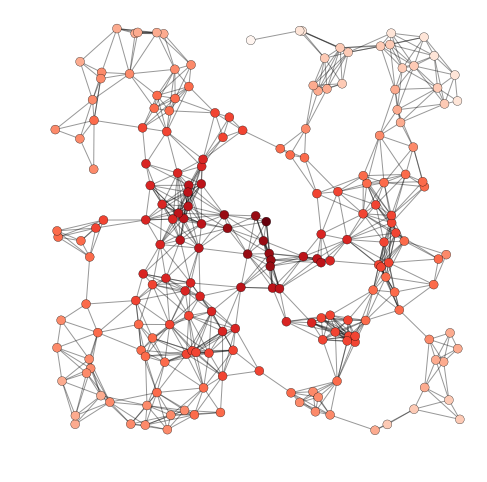

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.random_geometric_graph(200,0.125)
# position is stored as node attribute data for random_geometric_graph
pos=nx.get_node_attributes(G,'pos')

# find node near center (0.5,0.5)
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

# color by path length from node near center
p=nx.single_source_shortest_path_length(G,ncenter)

plt.figure(figsize=(8,8))
nx.draw_networkx_edges(G,pos,nodelist=[ncenter],alpha=0.4)
nx.draw_networkx_nodes(G,pos,nodelist=p.keys(),
                       node_size=80,
                       node_color=p.values(),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.axis('off')

## Numba

[[back to top]](#Table-of-Contents)

[Numba](http://numba.pydata.org/) is a just-in-time compiler that makes things faster with one simple line.
And can make use of parallel CPU and [GPU](http://numba.pydata.org/numba-doc/latest/cuda/index.html) calculation.

In [4]:
# website
HTML('<iframe src="http://numba.pydata.org/" width=1000 height=300></iframe>')

Basic usage: add a decorator and get a faster function.
Note that the first run of the compiled function takes longer as it needs time to be compiled in the first run.

In [19]:
import numba
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result
sum2d_numba = numba.jit(sum2d)
x = np.random.random((100, 100))
%timeit sum2d(x)
%timeit sum2d_numba(x)

100 loops, best of 3: 2.53 ms per loop
The slowest run took 6550.70 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 10.1 µs per loop


Timing example: [Pairwise distance](https://jakevdp.github.io/blog/2013/06/15/numba-vs-cython-take-2/)
<img  src="_static/pairwise_distance_timings.png"/>

## IPython Parallel

[[back to top]](#Table-of-Contents)

Module for easy [parallel calculations](https://ipython.org/ipython-doc/3/parallel/parallel_intro.html).
Install with conda

    conda install ipyparallel
    
and start a cluster of four processes in this case.

    ipcluster start -n 8
    
Now we create a client and a direct view object on that client. In short, this gives a handle on all the instances of the cluster and we can perform the same operation on all of them, such as importing modules or defining functions by the `%px` line magic.

In [12]:
from ipyparallel import Client
pc = Client()
dview = pc[:]

# import time on all remote instances, if you did not start the cluster or it is still starting up you will get an error
%px import time
# and also import it here in the notebook for reference
import time

Mock function to illustrate the idea.

In [13]:
def wait(i):
    time.sleep(.5)
    return i

Execution takes about four seconds, as expected.

In [15]:
%%time
result = map(wait, range(8))
print result

[0, 1, 2, 3, 4, 5, 6, 7]
Wall time: 4 s


Now we create a parallel version of `wait` (can also be done with a decorator).
And we only take less than a second to do it now.

In [16]:
%%time
worker = dview.map_async(wait, range(8))
result = worker.get()
print result

[0, 1, 2, 3, 4, 5, 6, 7]
Wall time: 616 ms


## Seaborn (and other graphic enhancements)

[[back to top]](#Table-of-Contents)

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Seaborn sits just on top of matplotlib and all usual commands still work.

There is a multitude of similar plotting libraries popping up right now.
Some are:

* [mpl3d](http://mpld3.github.io/) (on top of the d3.js framework, can convert from matplotlib plots)
* [plotly](https://plot.ly/)
* [bokeh](http://bokeh.pydata.org/en/latest/)

In [20]:
# website
# HTML('<iframe src="https://stanford.edu/~mwaskom/software/seaborn/" width=1000 height=450></iframe>')

Seaborn example.

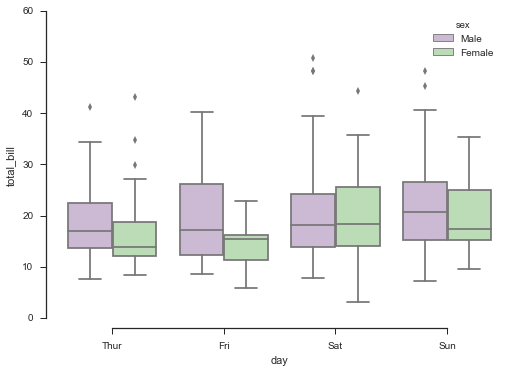

In [21]:
%matplotlib inline
from pylab import plt, np
import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

fig, ax = plt.subplots()
# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

## Cache cell magic

[[back to top]](#Table-of-Contents)

[Simple cell magic](https://github.com/rossant/ipycache) to save computation results to persistent pickle files.

In [22]:
%load_ext ipycache
import time

C:\Anaconda\lib\site-packages\IPython\config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
C:\Anaconda\lib\site-packages\IPython\utils\traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [23]:
%%cache mycache.pkl var1 var2
var1 = 1
var2 = 2
time.sleep(1)

[Skipped the cell's code and loaded variables var1, var2 from file 'D:\git\jupyter-introduction\mycache.pkl'.]


## Mayavi

[[back to top]](#Table-of-Contents)

3D visualization tool built on VTK.
Uses the aopt command line tool of Frauenhofer's [InstantReality engine](http://www.instantreality.org/downloads/).

In [24]:
%run mayavi_example.py

Display the result in an iframe. (Use static path in case aopt is not available on the system)

In [28]:
from IPython.display import IFrame

In [39]:
IFrame("_static/test_plot_3d.html", 600, 600)